In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

In [3]:
df = pd.read_csv(r"E:\\Greencell Internship Jul 2025- Assignment (1)\\Sample_Data.csv")
df.head(10)

,Values,Timestamp
0,100,26-06-2024 06:17:55
1,100,26-06-2024 06:18:11
2,100,26-06-2024 06:18:28
3,100,26-06-2024 06:18:45
4,100,26-06-2024 06:19:00
5,100,26-06-2024 06:19:16
6,100,26-06-2024 09:29:05
7,100,26-06-2024 09:29:21
8,100,26-06-2024 09:29:37
9,100,26-06-2024 09:29:53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21919 entries, 0 to 21918
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Values     21919 non-null  int64 
 1   Timestamp  21919 non-null  object
dtypes: int64(1), object(1)
memory usage: 342.6+ KB


In [5]:
#finding downward acceleration points
df['5_day_MA'] = df['Values'].rolling(window=5).mean()

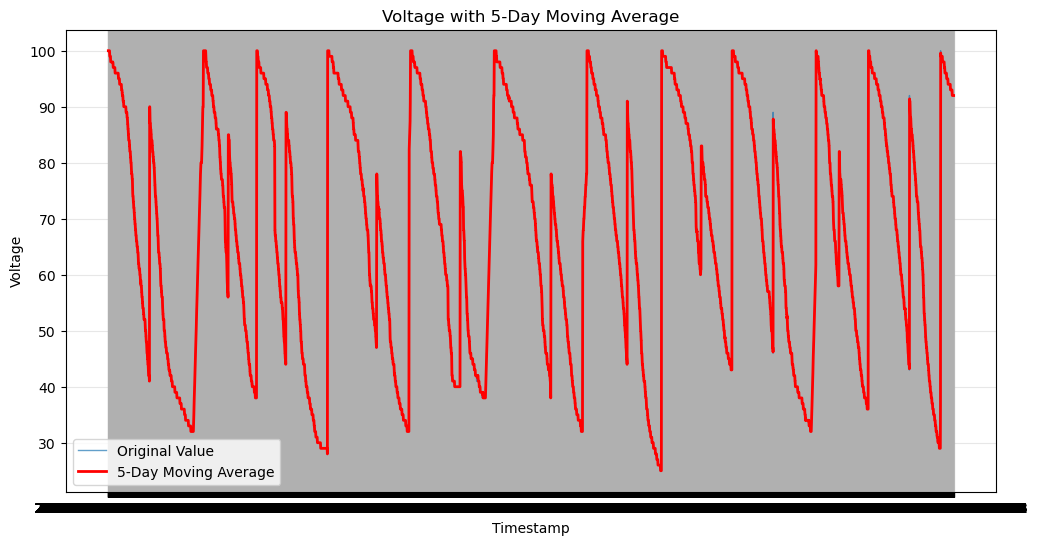

In [6]:
#Voltage of 5 Random days with Moving 
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Values'], label='Original Value', linewidth=1, alpha=0.7)
plt.plot(df['Timestamp'], df['5_day_MA'], label='5-Day Moving Average', linewidth=2, color='red')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.title('Voltage with 5-Day Moving Average')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# Finding maxima as peaks
peaks, _ = find_peaks(df['Values'], height=50)
peaks_table = df.iloc[peaks][['Timestamp', 'Values']]

In [10]:
# Finding minima as lows  
lows, _ = find_peaks(-df['Values'])
lows_table = df.iloc[lows][['Timestamp', 'Values']]

In [13]:
print("=== LOCAL PEAKS ===")
print(peaks_table.head(15))

=== LOCAL PEAKS ===
                Timestamp  Values
122   26-06-2024 09:57:56      98
361   26-06-2024 10:58:57      93
557   26-06-2024 11:49:49      83
603   26-06-2024 12:01:22      79
798   26-06-2024 12:55:48      62
843   26-06-2024 13:07:07      59
1073  26-06-2024 15:23:37      90
1173  26-06-2024 15:53:34      81
2495  26-06-2024 22:31:32     100
2866  27-06-2024 00:33:37      85
3116  27-06-2024 03:16:27      85
3198  27-06-2024 03:54:40      77
3265  27-06-2024 04:24:55      71
3412  27-06-2024 05:04:45      62
3440  27-06-2024 05:12:12      60


In [14]:
print("\n=== LOCAL LOWS ===")
print(lows_table.head(15))


=== LOCAL LOWS ===
                Timestamp  Values
120   26-06-2024 09:57:38      97
360   26-06-2024 10:58:56      92
556   26-06-2024 11:49:32      82
602   26-06-2024 12:01:06      78
795   26-06-2024 12:55:00      61
839   26-06-2024 13:06:17      58
1066  26-06-2024 14:05:23      41
1171  26-06-2024 15:53:00      80
1593  26-06-2024 18:14:03      42
2173  26-06-2024 20:57:58      32
2865  27-06-2024 00:33:20      84
3104  27-06-2024 02:32:57      56
3197  27-06-2024 03:54:23      76
3262  27-06-2024 04:24:22      70
3411  27-06-2024 05:04:30      61


In [15]:
peaks_table.to_csv('peaks.csv', index=False)
lows_table.to_csv('lows.csv', index=False)

In [16]:
#instance the Voltage went below 20
voltage_below_20 = df[df['Values'] < 20][['Timestamp', 'Values']]

In [17]:
print("=== VOLTAGE BELOW 20 ===")
print(voltage_below_20)

=== VOLTAGE BELOW 20 ===
Empty DataFrame
Columns: [Timestamp, Values]
Index: []


In [19]:
#Finding Slope & acceleration
df['slope'] = df['Values'].diff()
df['acceleration'] = df['slope'].diff()

In [20]:
downward_acceleration = df[(df['slope'] < 0) & (df['acceleration'] < 0)]

In [21]:
print("=== DOWNWARD SLOPE ACCELERATION ===")
print(downward_acceleration[['Timestamp', 'Values', 'slope', 'acceleration']].head(10))

=== DOWNWARD SLOPE ACCELERATION ===
               Timestamp  Values  slope  acceleration
36   26-06-2024 09:36:30      99   -1.0          -1.0
60   26-06-2024 09:42:33      98   -1.0          -1.0
120  26-06-2024 09:57:38      97   -1.0          -1.0
125  26-06-2024 09:58:47      97   -1.0          -1.0
174  26-06-2024 10:11:06      96   -1.0          -1.0
261  26-06-2024 10:33:38      95   -1.0          -1.0
292  26-06-2024 10:41:38      94   -1.0          -1.0
342  26-06-2024 10:54:01      93   -1.0          -1.0
360  26-06-2024 10:58:56      92   -1.0          -1.0
363  26-06-2024 10:59:29      92   -1.0          -1.0


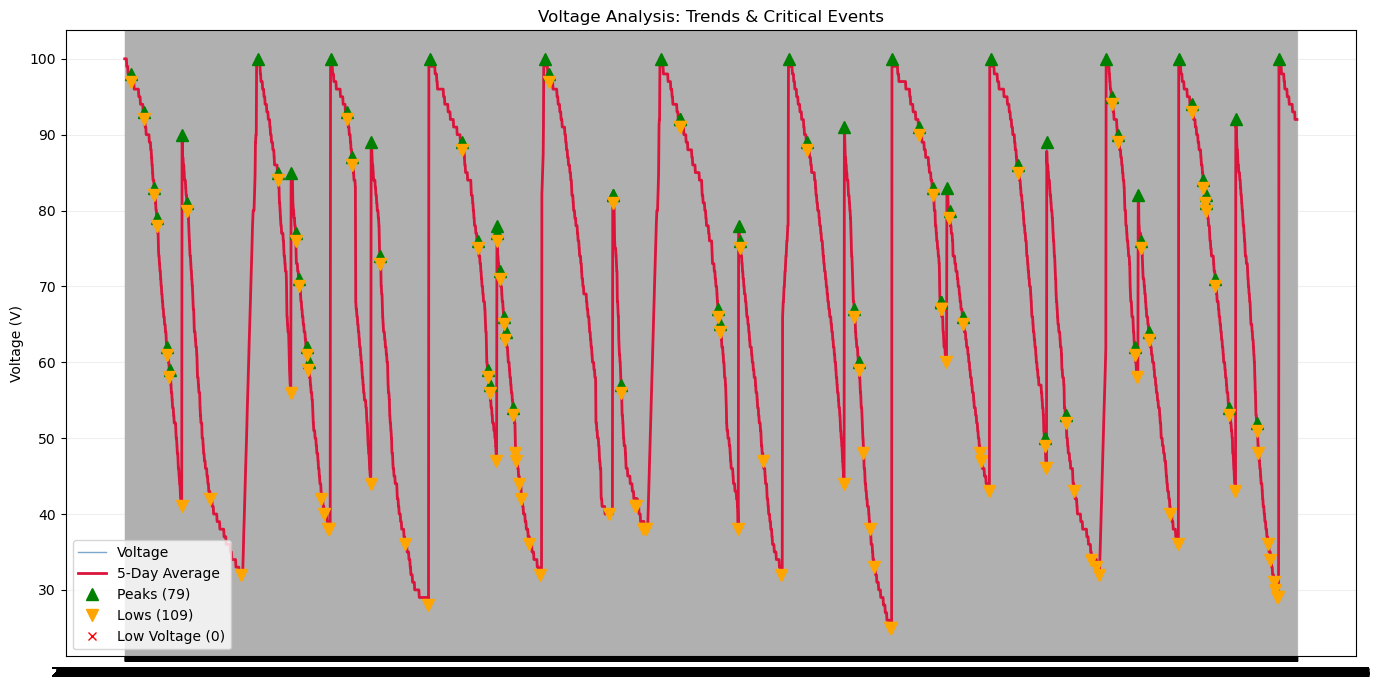

In [22]:
# Create main voltage analysis plot
plt.figure(figsize=(14, 7))
# Plot voltage data and trends
plt.plot(df['Timestamp'], df['Values'], 'steelblue', alpha=0.7, label='Voltage', linewidth=1)
plt.plot(df['Timestamp'], df['5_day_MA'], 'crimson', label='5-Day Average', linewidth=2)

# Highlight key events
plt.plot(df['Timestamp'].iloc[peaks], df['Values'].iloc[peaks], '^', color='green', markersize=9, label=f'Peaks ({len(peaks)})')
plt.plot(df['Timestamp'].iloc[lows], df['Values'].iloc[lows], 'v', color='orange', markersize=9, label=f'Lows ({len(lows)})')

# Mark critical low voltage
low_voltage_mask = df['Values'] < 20
plt.plot(df['Timestamp'][low_voltage_mask], df['Values'][low_voltage_mask], 'rx', markersize=6, label=f'Low Voltage ({low_voltage_mask.sum()})')
plt.title('Voltage Analysis: Trends & Critical Events')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [ ]:
# Create rate analysis plot
plt.figure(figsize=(14, 5))
# Plot rate metrics
plt.plot(df['Timestamp'], df['slope'], 'navy', label='Slope (1st Derivative)', linewidth=1.5)
plt.plot(df['Timestamp'], df['acceleration'], 'darkorange', label='Acceleration (2nd Derivative)', linewidth=1.5)

# Add zero reference line
plt.axhline(y=0, color='gray', linestyle=':', alpha=0.7, label='Zero Reference')

plt.title('Voltage Rate of Change Analysis')
plt.xlabel('Timestamp')
plt.ylabel('Rate of Change')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Print analysis summary
print(f"📊 ANALYSIS SUMMARY")
print("=" * 35)
print(f"Peaks detected: {len(peaks)}")
print(f"Lows detected: {len(lows)}")
print(f"Low voltage alerts: {low_voltage_mask.sum()}")
print(f"Dataset size: {len(df)} points")